<img src="Images/slide_1.png" width="700" height="700">


<img src="Images/slide_2.png" width="700" height="700">

## Decision Tree

- Decision Trees are considered one of the most mature, traditional algorithms in predictive analytics

- They are most likely used for classification problems


## Why and where we need Decision Tree ?

- When features are Categorical 

## Practical Examples of Decision Tree

- You’ll take a small dataset and see if you can learn anything from it

- You’ll see if a decision tree can give you any insight as to how the eye doctor prescribes contact lenses

- You can predict the type of lenses people will use and understand the underlying processes with a decision tree

- Predict does a player plays tennis outside based on weather conditions


## Lens Dataset

Attribute Information:

 3 Classes

 1 : the patient should be fitted with hard contact lenses,

 2 : the patient should be fitted with soft contact lenses,

 3 : the patient should not be fitted with contact lenses.
 
4 Features

1. age of the patient: (1) young, (2) pre-presbyopic, (3) presbyopic

2. spectacle prescription:  (1) myope, (2) hypermetrope

3. astigmatic:     (1) no, (2) yes

4. tear production rate:  (1) reduced, (2) normal

<img src="Images/lens_data.png" width="200" height="200">

<img src="Images/lens_DT.png" width="500" height="500">

## The root and the leafs for Decision Tree are obtained based on 

- Conditional Probability

- Entropy

- Information Gain

## Calculate the entropy for a fair coin

Entropy shows the uncertainy about a random variable

Show that the fair coin has the largest entropy (uncertainty)

In [2]:
import numpy as np

def entropy(p):
    H = np.array([-i*np.log2(i) for i in p]).sum()
    return H
    
p = [.5, .5]
entropy(p)

1.0

### Change p (probability of head and tale) and plot entropy for different p

<img src="Images/coin_entropy.jpg" width="500" height="500">

 The fair coin has the highest entropy which means a fair coin has the highest uncertain result when toss a coin

## Lets build a Decision Tree for Tennis Data

The following table informs about decision making factors to play tennis at outside based on 14 days data, for different weather conditions

<img src="Images/dst_1.png" width="400" height="400">

## Activity: Obtain the following quantitites:

- Obtain the entropy of `PlayTennis` (Decision) column. Hint: p = [9/14, 5/14] which represents the probability that a player plays tennis or not

`Entropy(Decision) = – (9/14) . log2(9/14) – (5/14) . log2(5/14) = 0.940`


- Wind factor on Decision

    - Obtain the entropy of conditional probability `p(PlayTennis | Wind = Weak) = [2/8, 6/8]`
    
    - <img src="Images/weak_wind_decision.png" width="400" height="400">
    
    - Obtain the entropy of conditional probability `p(PlayTennis | Wind = Strong) = [3/6, 3/6]`
    
    -  <img src="Images/strong_wind_decision.png" width="400" height="400">

## Obtain the Information Gain Between PlayTennis (Decision) and Wind

- What is the probability that wind be weak? Hint = Count how many weak wind we have devide over how many sample we have.

`p(Wind = Weak) = 8/ 14`

`p(Wind = Strong) = 6/ 14`

- Information Gain(Decision, Wind) = 

`Entropy(Decision) - p(Wind = Weak)Entropy(Decision | Wind = Weak ) - p(Wind = Strong)Entropy(Decision | Wind = Strong )`

= 0.048

## Other factors on Decision column

We have applied similar calculation on the other features (columns)

1 - Gain(Decision, Wind) = 0.048

2 - Gain(Decision, Outlook) = 0.246

3 - Gain(Decision, Temperature) = 0.029

4 - Gain(Decision, Humidity) = 0.151

### We can see Outlook and Decision has the highest Gain, so Outlook would be the root for the Decision Tree

## If keep continuing the calculation of Information Gain between nodes (features), 

## The tree is built based on the highest Information Gains

## Activity: Build the decision tree with sklearn for tennis dataset

#### For Decision Tree Visualization in Python:

Packages that are needed:

`conda install -c anaconda graphviz`

`conda install -c anaconda pydot`

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install graphviz

           a     b       c       d    e
1      Sunny   Hot    High    Weak   No
2      Sunny   Hot    High  Strong   No
3   Overcast   Hot    High    Weak  Yes
4       Rain  Mild    High    Weak  Yes
5       Rain  Cool  Normal    Weak  Yes
6       Rain  Cool  Normal  Strong   No
7   Overcast  Cool  Normal  Strong  Yes
8      Sunny  Mild    High    Weak   No
9      Sunny  Cool  Normal    Weak  Yes
10      Rain  Mild  Normal    Weak  Yes
11     Sunny  Mild  Normal  Strong  Yes
12  Overcast  Mild    High  Strong  Yes
13  Overcast   Hot  Normal    Weak  Yes
14      Rain  Mild    High  Strong   No
    a  b  c  d  e
1   2  1  0  1  0
2   2  1  0  0  0
3   0  1  0  1  1
4   1  2  0  1  1
5   1  0  1  1  1
6   1  0  1  0  0
7   0  0  1  0  1
8   2  2  0  1  0
9   2  0  1  1  1
10  1  2  1  1  1
11  2  2  1  0  1
12  0  2  0  0  1
13  0  1  1  1  1
14  1  2  0  0  0


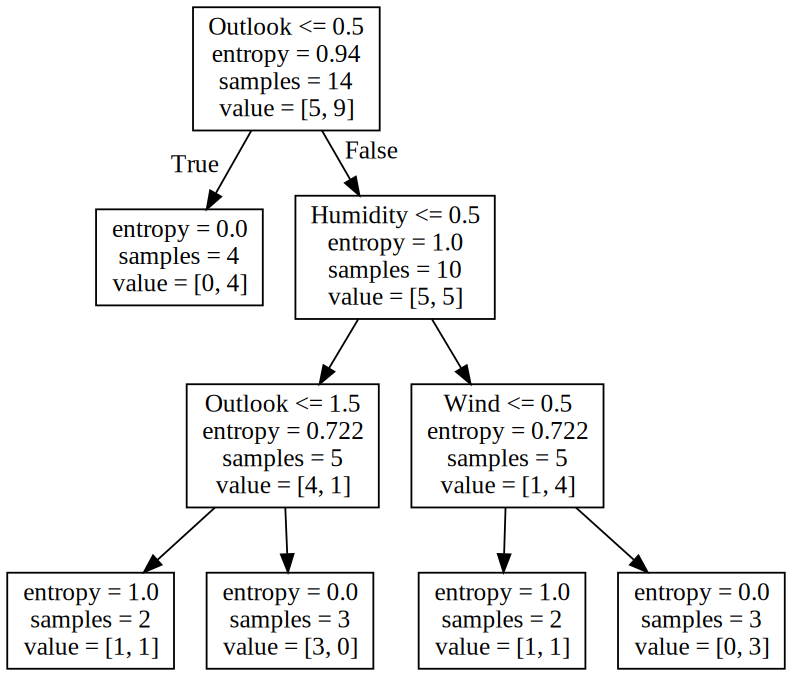

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


data = pd.read_csv('Datasets/tennis.txt', delimiter="\t", header=None, names=['a', 'b', 'c', 'd', 'e'])
print(data)

data_encoded = data.apply(preprocessing.LabelEncoder().fit_transform)
print(data_encoded)

#
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# one_hot_data = pd.get_dummies(data[['a', 'b', 'c', 'd']], drop_first=True)
# print(one_hot_data)
clf.fit(data_encoded[['a', 'b', 'c', 'd']], data_encoded['e'])


dot_data = export_graphviz(clf, out_file=None, feature_names=['Outlook', 'Temp.', 'Humidity', 'Wind'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png('Images/tennis_tree.png')

graph.write_png('original_tree.png')
graph.set_size('"11,12!"')
graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(graph.to_string())
gvz_graph

## Summary:

- A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences

- Decision Tree provides an effective method of Decision Making 

- The best feature of using trees for analytics - easy to interpret and explain to executives

- The mechanism behind DT are maximizing information gains while have different options 

## Resources:

- https://sefiks.com/2017/11/20/a-step-by-step-id3-decision-tree-example/

- https://heartbeat.fritz.ai/introduction-to-decision-tree-learning-cd604f85e236

- https://journals.plos.org/plosone/article/figure/image?id=10.1371/journal.pone.0161696.g002&size=inline
    